##### Import the required libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

## 1. Import the test and train dataset

In [3]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

#familiarize with the dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#size of the dataset
train.shape, test.shape

((891, 12), (418, 11))

In [5]:
#shows 10 random rows
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
455,456,1,3,"Jalsevac, Mr. Ivan",male,29.0,0,0,349240,7.8958,NaN,C
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
617,618,0,3,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,26.0,1,0,A/5. 3336,16.1000,NaN,S
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S
272,273,1,2,"Mellinger, Mrs. (Elizabeth Anne Maidment)",female,41.0,0,1,250644,19.5000,NaN,S
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,B38,S
727,728,1,3,"Mannion, Miss. Margareth",female,NaN,0,0,36866,7.7375,NaN,Q
309,310,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C
355,356,0,3,"Vanden Steen, Mr. Leo Peter",male,28.0,0,0,345783,9.5000,NaN,S


In [6]:
#descriptive statistics
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Observations** from above:
**Age** has 177 missing values

In [7]:
#datatypes of each features
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

* Survived, Pclass, Parch, Fare - Int
* Age, Fare - Float
* Name, Sex, Ticket, Cabin, Embarked - String           

test dataset is missing the **Survived** column since that has to be predicted

In [8]:
#store passengerId in a variable for easy access
passengerId = test['PassengerId']

##### Analysis goal : Survived is the dependent variable. It is 1 for **survived** and 0 for **not survived**. Rest of the features are independent variables that can be used as a potential predictor for predicting the outcome of **Survived**. An algorithm can be used on the train dataset and then tested using the test dataset. 

Text(0.5, 1.0, 'Survival rate by Embarked')

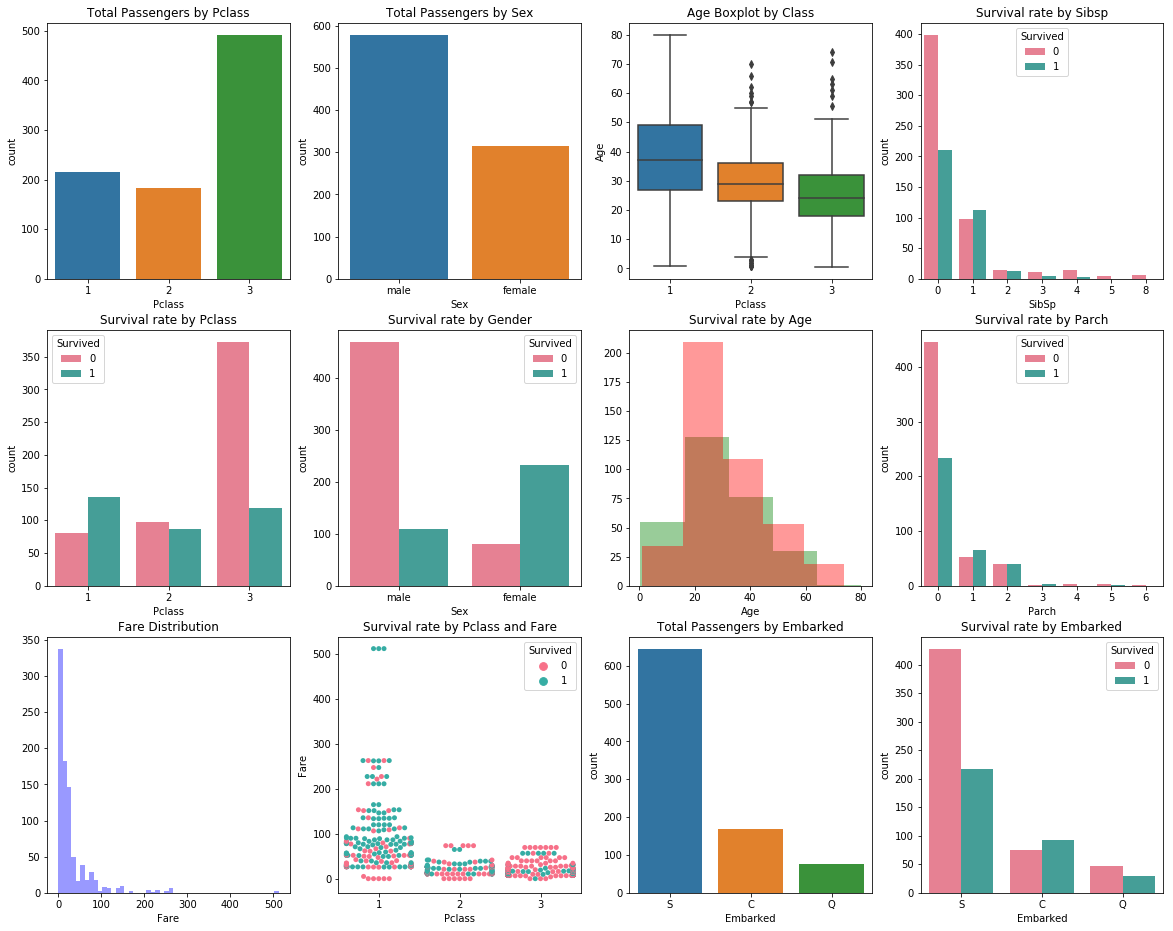

In [10]:
#First visual look into the dataset
f, ax = plt.subplots(3,4, figsize = (20, 16))
sns.countplot('Pclass', data = train, ax = ax[0,0])
sns.countplot('Sex', data = train, ax = ax[0,1])
sns.boxplot(x = 'Pclass', y = 'Age', data = train, ax = ax[0,2])
sns.countplot(x = 'SibSp', hue = 'Survived', data = train, ax = ax[0,3], palette = 'husl')
sns.countplot('Pclass', hue = 'Survived', data = train, ax = ax[1,0], palette = 'husl')
sns.countplot('Sex', hue = 'Survived', data = train, ax = ax[1,1], palette = 'husl')
sns.distplot(train[train['Survived'] == 1]['Age'].dropna(), kde = False, color = 'g', bins = 5, ax = ax[1,2])
sns.distplot(train[train['Survived'] == 0]['Age'].dropna(), kde = False, color = 'r', bins = 5, ax = ax[1,2])
sns.countplot('Parch', hue = 'Survived', data = train, ax = ax[1,3], palette = 'husl')
sns.distplot(train['Fare'].dropna(), ax = ax[2,0], kde = False,color = 'b')
sns.swarmplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = train, ax = ax[2,1], palette = 'husl')
sns.countplot('Embarked', data = train, ax = ax[2,2])
sns.countplot(x = 'Embarked', hue = 'Survived', data = train, ax = ax[2,3], palette = 'husl')

#set title
ax[0,0].set_title('Total Passengers by Pclass')
ax[0,1].set_title('Total Passengers by Sex')
ax[0,2].set_title('Age Boxplot by Class')
ax[0,3].set_title('Survival rate by Sibsp')
ax[1,0].set_title('Survival rate by Pclass')
ax[1,1].set_title('Survival rate by Gender')
ax[1,2].set_title('Survival rate by Age')
ax[1,3].set_title('Survival rate by Parch')
ax[2,0].set_title('Fare Distribution')
ax[2,1].set_title('Survival rate by Pclass and Fare')
ax[2,2].set_title('Total Passengers by Embarked')
ax[2,3].set_title('Survival rate by Embarked')

##  2. EDA, cleaning and Engineering features

#### 2.1 Correcting and completing features

Viewing the data there doesn't seem to be any evident abberant data. Lets consider the columns Age, Sibsp, Parch, Fare to see if there are any anamolies. 

In [40]:
#Outlier detection 
def detect_outliers(df,n,features):
    outlier_indices = []
    #iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col],25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index       
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers   
# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(train,2,["Age","SibSp","Parch","Fare"])
train.loc[Outliers_to_drop] # Show the outliers rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


Observations from the outliers:
1. 10 outliers were found
2. Passengers 28, 89, 342 have high Fare
3. Rest of them have high SibSp values
3. Lets keep them for now.

**Later we can check what happens to the prediction if we remove them**

Completing features: Finding missing values

In [104]:
train.info()
print('-'*35)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null obje

Age, Cabin and Embarked have missing values. These have to be filled since some algorithms fail as they don't know how to handle the missing values. 

#### 2.2 Descriptive analysis - Univariate 

In [105]:
full_data = [train, test]
train['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

#### 2.3 Feature engineering - Bivariate analysis

One of the first tasks in Data Analytics is to convert the variables into numerical/ordinal values. There are multiple types of data

a) Qualitative data: discrete

Nominal: no natural order between categories. In this case: Name
Categorical: Sex

b) Numeric or quantitative data

Discrete: could be ordinal like Pclass or not like Survived.
Continuous. e.g.: age Many feature engineering steps were taken from Anisotropic's excellent kernel.

Pclass vs Survived

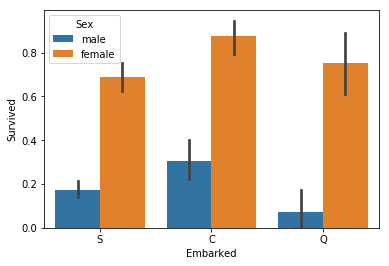

In [106]:
sns.barplot(x = 'Embarked', y = 'Survived', hue = 'Sex', data = train)

Embarked doesn't seem to have any effect on the survival rate

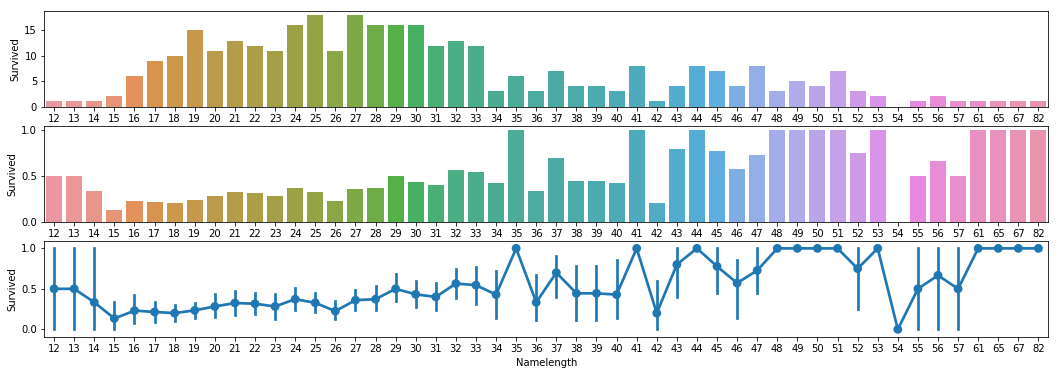

In [107]:
for dataset in full_data:
    dataset['Namelength'] = train['Name'].apply(len)
    
sum_name = train[['Namelength', 'Survived']].groupby('Namelength', as_index = False).sum()
avg_survival = train[['Namelength', 'Survived']].groupby('Namelength', as_index = False).mean()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (18,6))
sns.barplot(x='Namelength', y='Survived', data=sum_name, ax = ax1)
sns.barplot(x='Namelength', y='Survived', data=avg_survival, ax = ax2)
sns.pointplot(x = 'Namelength', y = 'Survived', data=train, ax = ax3)

Fig 1: Total number of people survived by Namelength
Fig 2 : Survival rate by Namelength

Based on the survial rates there are 4 categories suggested: < 24, 24 to 28, 29 to 40, >41

In [108]:
for dataset in full_data:
    dataset.loc[ dataset['Namelength'] <= 23, 'Namelength']                                   = 0
    dataset.loc[(dataset['Namelength'] > 23) & (dataset['Namelength'] <= 28), 'Namelength']  = 1
    dataset.loc[(dataset['Namelength'] > 28) & (dataset['Namelength'] <= 40), 'Namelength']  = 2
    dataset.loc[ dataset['Namelength'] > 40, 'Namelength']                                    = 3
    
train['Namelength'].value_counts() 

0    360
1    240
2    201
3     90
Name: Namelength, dtype: int64

In [109]:
#mapping gender
for dataset in full_data:# Mapping Gender
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)    